In [ ]:
%cd /content/drive/MyDrive/collab_sandbox/learn_DL/dive_into_dl/2.0/

/content/drive/MyDrive/collab_sandbox/learn_DL/dive_into_dl/2.0


# 2.1.1 Getting Started

In [ ]:
import torch

In [ ]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
torch.tensor([ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
x.shape

torch.Size([12])

In [ ]:
x.numel()

12

In [ ]:
x.reshape(3, 4)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

same operation

In [ ]:
x.reshape(3, -1)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [ ]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

 Each of its elements is randomly sampled from a standard Gaussian (normal) distribution
with a mean of 0 and a standard deviation of 1.

In [ ]:
torch.randn(3, 4)

tensor([[-1.0873, -0.3280, -0.2824,  0.0063],
        [-0.9874, -1.5500,  0.6896,  0.1181],
        [ 0.0813, -0.8334,  0.6927, -2.3117]])

In [ ]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [ ]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
print(x + y) 
print(x - y) 
print(x * y) # elementwise operation
print(x / y) 
print(x**y) # The ** operator is exponentiation

tensor([ 3.,  4.,  6., 10.])
tensor([-1.,  0.,  2.,  6.])
tensor([ 2.,  4.,  8., 16.])
tensor([0.5000, 1.0000, 2.0000, 4.0000])
tensor([ 1.,  4., 16., 64.])


In [ ]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [ ]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [ ]:
X.sum()

tensor(66.)

In [ ]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

# 2.1.5 Saving Memory

In [ ]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [ ]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))


id(Z): 140061534958032
id(Z): 140061534958032


Or

In [ ]:
before = id(X)
X += Y
id(X) == before

True

# 2.1.6 Conversion to Other Python Objects

In [ ]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [ ]:
X.numpy()

array([[26., 25., 28., 27.],
       [25., 26., 27., 28.],
       [20., 21., 22., 23.]], dtype=float32)

In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)


(tensor([3.5000]), 3.5, 3.5, 3)

# 2.2 Data Preprocessing

In [ ]:
import os
os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
  f.write('NumRooms,Alley,Price\n') # Column names
  f.write('NA,Pave,127500\n') # Each row represents a data example
  f.write('2,NA,106000\n')
  f.write('4,NA,178100\n')
  f.write('NA,NA,140000\n')

In [ ]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [ ]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [ ]:
outputs

0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64

In [ ]:
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


In [ ]:
import torch
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

# 2.3 Linear Algebra

### 2.3.1 Scalars

In [ ]:
import torch
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 2.3.2 Vectors


In [ ]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [ ]:
len(x)

4

In [ ]:
x.shape

torch.Size([4])

### 2.3.3 Matrices

In [ ]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [ ]:
A = torch.arange(20).reshape(5, -1)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [ ]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

B is simmetric 

In [ ]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [ ]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 2.3.4 Tensors

tensors is just n-dimensional matrices.

Tensors will become more important when we start working with images, which arrive as ndimensional arrays with 3 axes corresponding to the height, width, and a channel axis for stacking
the color channels (red, green, and blue).

In [ ]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 2.3.5 Basic Properties of Tensor Arithmetic

In [ ]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone() # Assign a copy of `A` to `B` by allocating new memory
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [ ]:
 A + B

tensor([[ 0.,  2.,  4.,  6.],
        [ 8., 10., 12., 14.],
        [16., 18., 20., 22.],
        [24., 26., 28., 30.],
        [32., 34., 36., 38.]])

Hadamard product (math
notation ⊙

In [ ]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [ ]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [ ]:
a + X

tensor([[[ 2,  3,  4,  5],
         [ 6,  7,  8,  9],
         [10, 11, 12, 13]],

        [[14, 15, 16, 17],
         [18, 19, 20, 21],
         [22, 23, 24, 25]]])

In [ ]:
type(X.shape[-1])

int

### 2.3.6 Reduction

In [ ]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()


(tensor([0., 1., 2., 3.]), tensor(6.))

In [ ]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [ ]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [ ]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape


(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [ ]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [ ]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [ ]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

In [ ]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [ ]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [ ]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [ ]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

### 2.3.7 Dot Products

In [ ]:
y = torch.ones(4, dtype=torch.float32)

In [ ]:
x

tensor([0., 1., 2., 3.])

In [ ]:
torch.dot(x, y)

tensor(6.)

In [ ]:
torch.sum(x * y)

tensor(6.)

### 2.3.8 Matrix-Vector Products

In [ ]:
x

tensor([0., 1., 2., 3.])

In [ ]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [ ]:
torch.mv(A, x), torch.mv(A, x).shape

(tensor([ 14.,  38.,  62.,  86., 110.]), torch.Size([5]))

In [ ]:
A.shape, x.shape,

(torch.Size([5, 4]), torch.Size([4]))

### 2.3.9 Matrix-Matrix Multiplication

In [ ]:
B = torch.ones(4, 3)

In [ ]:
A, A.shape

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), torch.Size([5, 4]))

In [ ]:
B, B.shape

(tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]), torch.Size([4, 3]))

In [ ]:
torch.mm(A, B), torch.mm(A, B).shape

(tensor([[ 6.,  6.,  6.],
         [22., 22., 22.],
         [38., 38., 38.],
         [54., 54., 54.],
         [70., 70., 70.]]), torch.Size([5, 3]))

### 2.3.10 Norms

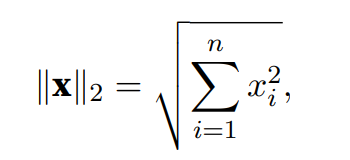

In [97]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)


tensor(5.)

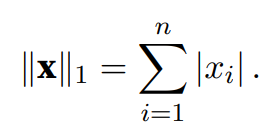

In [98]:
torch.abs(u).sum()


tensor(7.)

Analogous to L2 norms of vectors, the Frobenius norm of a matrix X ∈ R
m×n
is the square root of
the sum of the squares of the matrix elements:


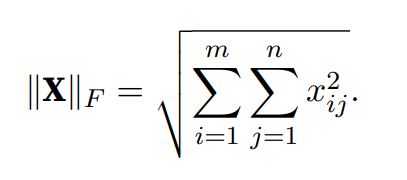

In [100]:
torch.ones((4, 9))

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [101]:
torch.norm(torch.ones((4, 9))) # 9 + 9 + 9 + 9 = 36^(1/2) = 6

tensor(6.)